<a href="https://colab.research.google.com/github/ravi-kiran-iiml/my_git/blob/master/Bank_Customer_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About this dataset:

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


Data source:
http://archive.ics.uci.edu/ml/machine-learning-databases/00222/

In [0]:
# we start with uploading the file

from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full (1).csv


In [0]:
# uploading as a csv and rendering the top few lines to get a picture of this dataset

import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']))
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [0]:
# Let's have a look at the column headers here

print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


We find several columns have textfield data which we need to convert to numeric forms. 

Columns with text data are:
job / 
marital / 
education / 
default / 
housing /
loan /
contact /
month /
poutcome /
y

In [47]:
# Converting Job text field and creating Job_numeric as numeric representation of the corresponding text field

from collections import Counter
job_count = Counter(df['job'])

words = job_count.keys()
indexes = list(range(len(words)))
z = {key:value for key, value in zip(words, indexes)}

job_original = df['job'].values
job_numeric = []
for i in range(len(job_original)):
  for key, value in z.items():
    if job_original[i] == key:
      job_numeric.append(value)

df['job_numeric'] = job_numeric
df.head()


,age,job,job_numeric,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
# conversion for marital column

from collections import Counter
marital_count = Counter(df['marital'])

words = marital_count.keys()
indexes = list(range(len(words)))
z = {key:value for key, value in zip(words, indexes)}

marital_original = df['marital'].values
marital_numeric = []
for i in range(len(marital_original)):
  for key, value in z.items():
    if marital_original[i] == key:
      marital_numeric.append(value)

df['marital_numeric'] = marital_numeric
df.head()


,age,job,job_numeric,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_numeric
0,58,management,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [49]:
# conversion of education column

from collections import Counter
education_count = Counter(df['education'])

words = education_count.keys()
indexes = list(range(len(words)))
z = {key:value for key, value in zip(words, indexes)}

education_original = df['education'].values
education_numeric = []
for i in range(len(education_original)):
  for key, value in z.items():
    if education_original[i] == key:
      education_numeric.append(value)

df['education_numeric'] = education_numeric
df.head()


,age,job,job_numeric,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_numeric,education_numeric
0,58,management,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0
1,44,technician,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1
2,33,entrepreneur,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1
3,47,blue-collar,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,2
4,33,unknown,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,2


In [50]:
# conversion of default column

from collections import Counter
default_count = Counter(df['default'])

words = default_count.keys()
indexes = list(range(len(words)))
z = {key:value for key, value in zip(words, indexes)}

default_original = df['default'].values
default_numeric = []
for i in range(len(default_original)):
  for key, value in z.items():
    if default_original[i] == key:
      default_numeric.append(value)

df['default_numeric'] = default_numeric
df.head()


,age,job,job_numeric,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_numeric,education_numeric,default_numeric
0,58,management,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0
1,44,technician,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1,0
2,33,entrepreneur,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,0
3,47,blue-collar,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,2,0
4,33,unknown,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,2,0


In [51]:
# conversion of housing column

from collections import Counter
housing_count = Counter(df['housing'])

words = housing_count.keys()
indexes = list(range(len(words)))
z = {key:value for key, value in zip(words, indexes)}

housing_original = df['housing'].values
housing_numeric = []
for i in range(len(housing_original)):
  for key, value in z.items():
    if housing_original[i] == key:
      housing_numeric.append(value)

df['housing_numeric'] = housing_numeric
df.head()


,age,job,job_numeric,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_numeric,education_numeric,default_numeric,housing_numeric
0,58,management,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0
1,44,technician,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1,0,0
2,33,entrepreneur,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,0,0
3,47,blue-collar,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,2,0,0
4,33,unknown,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,2,0,1


In [52]:
# conversion of loan column

from collections import Counter
loan_count = Counter(df['loan'])

words = loan_count.keys()
indexes = list(range(len(words)))
z = {key:value for key, value in zip(words, indexes)}

loan_original = df['loan'].values
loan_numeric = []
for i in range(len(loan_original)):
  for key, value in z.items():
    if loan_original[i] == key:
      loan_numeric.append(value)

df['loan_numeric'] = loan_numeric
df.head()


,age,job,job_numeric,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric
0,58,management,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0,0
1,44,technician,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1,0,0,0
2,33,entrepreneur,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,0,0,1
3,47,blue-collar,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,2,0,0,0
4,33,unknown,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,2,0,1,0


In [53]:
# conversion of contact column

from collections import Counter
contact_count = Counter(df['contact'])

words = contact_count.keys()
indexes = list(range(len(words)))
z = {key:value for key, value in zip(words, indexes)}

contact_original = df['contact'].values
contact_numeric = []
for i in range(len(contact_original)):
  for key, value in z.items():
    if contact_original[i] == key:
      contact_numeric.append(value)

df['contact_numeric'] = contact_numeric
df.head()


,age,job,job_numeric,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric
0,58,management,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0,0,0
1,44,technician,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1,0,0,0,0
2,33,entrepreneur,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,0,0,1,0
3,47,blue-collar,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,2,0,0,0,0
4,33,unknown,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,2,0,1,0,0


In [54]:
# conversion of month column

from collections import Counter
month_count = Counter(df['month'])

words = month_count.keys()
indexes = list(range(len(words)))
z = {key:value for key, value in zip(words, indexes)}

month_original = df['month'].values
month_numeric = []
for i in range(len(month_original)):
  for key, value in z.items():
    if month_original[i] == key:
      month_numeric.append(value)

df['month_numeric'] = month_numeric
df.head()


,age,job,job_numeric,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric
0,58,management,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0,0,0,0
1,44,technician,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1,0,0,0,0,0
2,33,entrepreneur,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,0,0,1,0,0
3,47,blue-collar,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,2,0,0,0,0,0
4,33,unknown,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,2,0,1,0,0,0


In [55]:
# conversion of poutcome column

from collections import Counter
poutcome_count = Counter(df['poutcome'])

words = poutcome_count.keys()
indexes = list(range(len(words)))
z = {key:value for key, value in zip(words, indexes)}

poutcome_original = df['poutcome'].values
poutcome_numeric = []
for i in range(len(poutcome_original)):
  for key, value in z.items():
    if poutcome_original[i] == key:
      poutcome_numeric.append(value)

df['poutcome_numeric'] = poutcome_numeric
df.head()


,age,job,job_numeric,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric,poutcome_numeric
0,58,management,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0,0,0,0,0
1,44,technician,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1,0,0,0,0,0,0
2,33,entrepreneur,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,0,0,1,0,0,0
3,47,blue-collar,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,2,0,0,0,0,0,0
4,33,unknown,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,2,0,1,0,0,0,0


In [56]:
# conversion of labels datapoints

from collections import Counter
y_count = Counter(df['y'])

words = y_count.keys()
indexes = list(range(len(words)))
z = {key:value for key, value in zip(words, indexes)}

y_original = df['y'].values
y_numeric = []
for i in range(len(y_original)):
  for key, value in z.items():
    if y_original[i] == key:
      y_numeric.append(value)

df['y_numeric'] = y_numeric
df.head()


,age,job,job_numeric,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric,poutcome_numeric,y_numeric
0,58,management,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0
1,44,technician,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1,0,0,0,0,0,0,0
2,33,entrepreneur,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,0,0,1,0,0,0,0
3,47,blue-collar,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,2,0,0,0,0,0,0,0
4,33,unknown,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,2,0,1,0,0,0,0,0


In [69]:
# we put all of the numeric columns except label, together under X

X = df[['age', 'job_numeric',  'balance', 'day', 'duration',  'campaign', 'pdays', 'previous', 'marital_numeric', 'education_numeric',  'default_numeric', 'housing_numeric', 'loan_numeric', 'contact_numeric', 'month_numeric', 'poutcome_numeric']]
x = X.values
print(x)

[[  58    0 2143 ...    0    0    0]
 [  44    1   29 ...    0    0    0]
 [  33    2    2 ...    0    0    0]
 ...
 [  72    5 5715 ...    1    5    3]
 [  57    3  668 ...    2    5    0]
 [  37    2 2971 ...    1    5    2]]


In [71]:
# label is kept under y

y = df['y_numeric'].values
print(y)

[0 0 0 ... 1 0 0]


In [0]:
# normalizing all the values of X vectors

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [73]:
# splitting the dataset in training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31647, 16)
(31647,)
(13564, 16)
(13564,)


In [0]:
# creating the binary classification model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
# training the dataset with 100 epochs and batch size of 50

h = model.fit(x_train, y_train, epochs = 100, batch_size = 50, validation_data = (x_test, y_test))

Train on 31647 samples, validate on 13564 samples
Epoch 1/100
31647/31647 [==============================] - 1s 36us/step - loss: 0.2852 - accuracy: 0.8887 - val_loss: 0.2346 - val_accuracy: 0.9000
Epoch 2/100
31647/31647 [==============================] - 1s 33us/step - loss: 0.2392 - accuracy: 0.8973 - val_loss: 0.2296 - val_accuracy: 0.9017
Epoch 3/100
31647/31647 [==============================] - 1s 32us/step - loss: 0.2333 - accuracy: 0.8987 - val_loss: 0.2265 - val_accuracy: 0.9030
Epoch 4/100
31647/31647 [==============================] - 1s 31us/step - loss: 0.2290 - accuracy: 0.9002 - val_loss: 0.2257 - val_accuracy: 0.9031
Epoch 5/100
31647/31647 [==============================] - 1s 32us/step - loss: 0.2265 - accuracy: 0.9009 - val_loss: 0.2252 - val_accuracy: 0.9039
Epoch 6/100
31647/31647 [==============================] - 1s 31us/step - loss: 0.2245 - accuracy: 0.9015 - val_loss: 0.2233 - val_accuracy: 0.9046
Epoch 7/100
31647/31647 [==============================] - 1s 

In [0]:
# calculating predictions

predictions = model.predict(x_test)

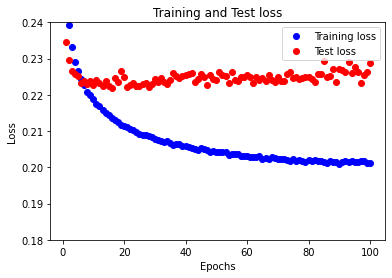

In [96]:
# plotting loss

import matplotlib.pyplot as plt


history_dict =  h.history

train_loss = history_dict['loss']
test_loss = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.ylim(0.18, 0.24)
plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, test_loss, 'ro', label = 'Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

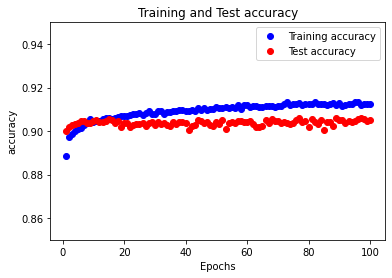

In [97]:
# plotting accuracy

history_dict =  h.history

train_loss = history_dict['accuracy']
test_loss = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.ylim(0.85, 0.95)
plt.plot(epochs, train_loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, test_loss, 'ro', label = 'Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()